In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train_dataset.csv')
df = df.drop(df[df['Apakah anda sedang menempuh pendidikan S1 atau sudah memiliki gelar S1'] == 'Tidak'].index)
df = df.drop(df[df['Apakah anda merasa cocok dengan jurusan yang sudah/sedang anda tempuh?'] == 'Tidak'].index)
df.head()

,Timestamp,Apakah anda sedang menempuh pendidikan S1 atau sudah memiliki gelar S1,Apakah anda merasa cocok dengan jurusan yang sudah/sedang anda tempuh?,Jenis kelamin anda,Nomor Handphone anda (untuk pemberian hadiah) *opsional,Jurusan yang anda sudah/sedang ditempuh,MBTI anda,Alasan anda memilih jurusan tersebut (Pilih maksimal 3),Yang manakah anda ketika memilih jurusan tersebut,Pelajaran yang anda sukai (pilih maksimal 3),"Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Matematika]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Fisika]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Kimia]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Biologi]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Ekonomi]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Geografi]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Sosiologi]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Sejarah]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Bahasa]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Seni]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Komputer]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Musik]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [PPKN]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Agama]","Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Penjasorkes]",Bidang yang anda sukai (pilih maksimal 2),Apakah anda memilih Sastra dan Kebudayaan di bidang yang anda sukai?,Pilih bahasa atau kebudayaan yang paling anda minati,Apakah anda memilih Agama di bidang yang anda sukai?,Pilih agama yang paling anda minati
0,23/03/2024 13:53:40,Ya,Ya,Laki - laki,NaN,Teknik Informatika,INTP,Prospek kerja yang bagus (mudah mendapatkan pe...,Belum pernah mempelajarinya namun tertarik,"Matematika, Fisika, Biologi",5.0,5.0,3.0,5.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,"Teknologi Informasi, Ilmu Pengetahuan Alam",Tidak,NaN,Tidak,NaN
1,23/03/2024 13:53:48,Ya,Ya,Laki - laki,NaN,Teknik Informatika,ISFJ,"Berkaitan dengan hobi, Menyadari bahwa kelebih...",Belum pernah mempelajarinya namun tertarik,"Matematika, Fisika",5.0,4.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3.0,3.0,1.0,"Teknologi Informasi, Teknik dan Industri",Tidak,NaN,Tidak,NaN
2,24/03/2024 18:04:32,Ya,Ya,Perempuan,NaN,Ilmu Hukum,ESFP,Menyadari bahwa kelebihanmu ada di bidang ters...,Belum pernah mempelajarinya namun tertarik,"Seni, Musik, Penjasorkes",1.0,1.0,1.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,5.0,"Hukum, Seni dan Musik",Tidak,NaN,Tidak,NaN
3,24/03/2024 18:20:03,Ya,Ya,Lak

In [ ]:
df = df.rename(columns={
    'Jenis kelamin anda': 'gender',
    'Jurusan yang anda sudah/sedang ditempuh': 'major',
    'MBTI anda': 'mbti',
    'Alasan anda memilih jurusan tersebut (Pilih maksimal 3)': 'reason', #to be split
    'Yang manakah anda ketika memilih jurusan tersebut': 'precond', #to be split
    'Pelajaran yang anda sukai (pilih maksimal 3)': 'favsubject', #to be split
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Matematika]": 'math_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Fisika]": 'physics_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Kimia]": 'chem_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Biologi]": 'bio_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Ekonomi]": 'eco_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Geografi]": 'geo_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Sosiologi]": 'soc_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Sejarah]": 'his_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Bahasa]": 'lang_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Seni]": 'art_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Komputer]": 'comp_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Musik]": 'music_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [PPKN]": 'civic_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Agama]": 'religion_score',
    "Kemampuan anda pada mata pelajaran SMA (saat SMA 3 atau kelas 12) berikut \n(0: mata pelajaran tidak ada, 1: tidak menguasai, 5: sangat menguasai) [Penjasorkes]": 'pe_score',
    'Bidang yang anda sukai (pilih maksimal 2)': 'field', #to be split
    'Pilih bahasa atau kebudayaan yang paling anda minati': 'specific_lang',
    'Pilih agama yang paling anda minati': 'specific_religion'
})

In [ ]:
duplicate_counts = df.groupby('major')['major'].transform('count')

df = df[duplicate_counts >= 7]
df

,Timestamp,Apakah anda sedang menempuh pendidikan S1 atau sudah memiliki gelar S1,Apakah anda merasa cocok dengan jurusan yang sudah/sedang anda tempuh?,gender,Nomor Handphone anda (untuk pemberian hadiah) *opsional,major,mbti,reason,precond,favsubject,math_score,physics_score,chem_score,bio_score,eco_score,geo_score,soc_score,his_score,lang_score,art_score,comp_score,music_score,civic_score,religion_score,pe_score,field,Apakah anda memilih Sastra dan Kebudayaan di bidang yang anda sukai?,specific_lang,Apakah anda memilih Agama di bidang yang anda sukai?,specific_religion
0,23/03/2024 13:53:40,Ya,Ya,Laki - laki,NaN,Teknik Informatika,INTP,Prospek kerja yang bagus (mudah mendapatkan pe...,Belum pernah mempelajarinya namun tertarik,"Matematika, Fisika, Biologi",5.0,5.0,3.0,5.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,"Teknologi Informasi, Ilmu Pengetahuan Alam",Tidak,NaN,Tidak,NaN
1,23/03/2024 13:53:48,Ya,Ya,Laki - laki,NaN,Teknik Informatika,ISFJ,"Berkaitan dengan hobi, Menyadari bahwa kelebih...",Belum pernah mempelajarinya namun tertarik,"Matematika, Fisika",5.0,4.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,3.0,3.0,1.0,"Teknologi Informasi, Teknik dan Industri",Tidak,NaN,Tidak,NaN
2,24/03/2024 18:04:32,Ya,Ya,Perempuan,NaN,Ilmu Hukum,ESFP,Menyadari bahwa kelebihanmu ada di bidang ters...,Belum pernah mempelajarinya namun tertarik,"Seni, Musik, Penjasorkes",1.0,1.0,1.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,5.0,"Hukum, Seni dan Musik",Tidak,NaN,Tidak,NaN
3,24/03/2024 18:20:03,Ya,Ya,Laki - laki,NaN,Teknik Informatika,ISFJ,Prospek kerja yang bagus (mudah mendapatkan pe...,Sudah pernah mempelajarinya dan tertarik,"Matematika, Kimia, Komputer",5.0,3.0,5.0,3.0,0.0,0.0,0.0,2.0,3.0,2.0,5.0,2.0,2.0,3.0,4.0,"Teknologi Informasi, Ekonomi",Tidak,NaN,Tidak,NaN
6,25/03/2024 14:23:51,Ya,Ya,Perempuan,8.133206e+10,Desain Komunikasi Visual,INFP,"Terinspirasi dari media luar (cthnya: film, bu...",Sudah pernah mempelajarinya dan tertarik,"Seni, Musik",4.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,4.0,2.0,4.0,3.0,"Hospitality, Seni dan Musik",Ya,Bahasa Jepang,Tidak,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,17/05/2024 23:09:02,Ya,Ya,Laki - laki,NaN,Ilmu Hukum,ISFJ,Prospek kerja yang bagus (mudah mendapatkan pe...,Biasa saja,Bahasa,1.0,2.0,1.0,1.0,3.0,2.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,"Hukum, Hospitality",Ya,Bahasa Inggris,Ya,Islam
198,18/05/2024 06:52:00,Ya,Ya,Laki - laki,8.984455e+09,Teknik Informatika,ESFP,Prospek kerja yang bagus (mudah mendapatkan pe...,Sudah pernah mempelajarinya dan tertarik,"Matematika, Fisika, Komputer",4.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,"Seni dan Musik, Teknologi Informasi",Tidak,NaN,Tidak,NaN
202,18/05/2024 10:03:44,Ya,Ya,Perempuan,NaN,Ilmu Hukum,ESTJ,"Gaji yang relatif tinggi, Terinspirasi dari me...",Belum pernah mempelajarinya namun tertarik,"Biologi, Bahasa, Musik",3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,1.0,"Hukum, Bisnis",Tidak,NaN,Tidak,NaN
203,18/05/2024 11:08:54,Ya,Ya,Perempuan,NaN,Desain Komunikasi Visual,INFP,"Gaji yang relatif tinggi, Berkaitan dengan hob...",Sudah pernah mempelajarinya dan tertarik,"Matematika, Seni, Penjasorkes",5.0,3.0,4.0,4.0,0.0,0.0,0.0,3.0,4.0,5.0,4.0,3.0,3.0,3.0,5.0,"Seni dan Musik, Ilmu Pengetahuan Alam",Tidak,NaN,Tidak,NaN


In [ ]:
df['major'].unique()

array(['Teknik Informatika', 'Ilmu Hukum', 'Desain Komunikasi Visual',
       'Manajemen', 'Farmasi', 'Psikologi', 'Akuntansi'], dtype=object)

In [ ]:
count_specific_value = len(df[df['major'] == "Hospitality Dan Pariwisata"])
count_specific_value

0

In [ ]:
X = df[['gender', 'mbti', 'reason', 'precond',
        'favsubject', 'math_score', 'physics_score','chem_score',
        'bio_score', 'eco_score', 'geo_score', 'soc_score',
        'his_score', 'lang_score', 'art_score', 'comp_score',
        'music_score', 'civic_score', 'religion_score', 'pe_score',
        'field', 'specific_lang', 'specific_religion'
]]
Y = df['major']

In [ ]:
X = X.astype({'math_score':'int64', 'physics_score':'int64','chem_score':'int64',
        'bio_score':'int64', 'eco_score':'int64', 'geo_score':'int64', 'soc_score':'int64',
        'his_score':'int64', 'lang_score':'int64', 'art_score':'int64', 'comp_score':'int64',
        'music_score':'int64', 'civic_score':'int64', 'religion_score':'int64', 'pe_score':'int64',})

In [ ]:
X.head()

,gender,mbti,reason,precond,favsubject,math_score,physics_score,chem_score,bio_score,eco_score,geo_score,soc_score,his_score,lang_score,art_score,comp_score,music_score,civic_score,religion_score,pe_score,field,specific_lang,specific_religion
0,Laki - laki,INTP,Prospek kerja yang bagus (mudah mendapatkan pe...,Belum pernah mempelajarinya namun tertarik,"Matematika, Fisika, Biologi",5,5,3,5,0,0,0,4,4,4,5,5,4,4,5,"Teknologi Informasi, Ilmu Pengetahuan Alam",NaN,NaN
1,Laki - laki,ISFJ,"Berkaitan dengan hobi, Menyadari bahwa kelebih...",Belum pernah mempelajarinya namun tertarik,"Matematika, Fisika",5,4,2,2,0,0,0,2,2,0,0,2,3,3,1,"Teknologi Informasi, Teknik dan Industri",NaN,NaN
2,Perempuan,ESFP,Menyadari bahwa kelebihanmu ada di bidang ters...,Belum pernah mempelajarinya namun tertarik,"Seni, Musik, Penjasorkes",1,1,1,4,3,3,4,3,3,4,3,3,4,4,5,"Hukum, Seni dan Musik",NaN,NaN
3,Laki - laki,ISFJ,Prospek kerja yang bagus (mudah mendapatkan pe...,Sudah pernah mempelajarinya dan tertarik,"Matematika, Kimia, Komputer",5,3,5,3,0,0,0,2,3,2,5,2,2,3,4,"Teknologi Informasi, Ekonomi",NaN,NaN
6,Perempuan,INFP,"Terinspirasi dari media luar (cthnya: film, bu...",Sudah pernah mempelajarinya dan tertarik,"Seni, Musik",4,1,1,2,0,0,0,1,1,4,0,4,2,4,3,"Hospitality, Seni dan Musik",Bahasa Jepang,NaN


In [ ]:
Y.unique()

array(['Teknik Informatika', 'Ilmu Hukum', 'Desain Komunikasi Visual',
       'Manajemen', 'Farmasi', 'Psikologi', 'Akuntansi'], dtype=object)

In [ ]:
def label_reason(row, reason):
    return reason in row['reason']

reasons = [
    "Prospek kerja yang bagus (mudah mendapatkan pekerjaan)",
    "Gaji yang relatif tinggi",
    "Mengikuti teman/pacar/orang yang dikenal",
    "Disuruh oleh orang tua/keluarga",
    "Terinspirasi dari media luar (cthnya: film, buku, influencer, dll)",
    "Terinspirasi dari orang sukses/ternama/keluarga",
    "Terkesan mudah untuk dijalankan",
    "Formalitas (Yang penting ada gelar)",
    "Mengikuti trend (FOMO)",
    "Berkaitan dengan hobi",
    "Menyadari bahwa kelebihanmu ada di bidang tersebut"
]

for i, reason in enumerate(reasons, start=1):
    X[f'reason_{i}'] = X.apply(lambda row: label_reason(row, reason), axis=1)

X = X.drop('reason', axis=1)

In [ ]:
def label_favsubject(row, favsubject):
    return favsubject in row['favsubject']

favsubjects = [
    "Matematika",
    "Fisika",
    "Kimia",
    "Biologi",
    "Ekonomi",
    "Geografi",
    "Sosiologi",
    "Sejarah",
    "Bahasa",
    "Seni",
    "Komputer",
    "Musik",
    "PPKN",
    "Agama",
    "Penjasorkes"
]

for i, favsubject in enumerate(favsubjects, start=1):
    X[f'{favsubject}_favsubject'] = X.apply(lambda row: label_favsubject(row, favsubject), axis=1)

X = X.drop('favsubject', axis=1)

In [ ]:
def label_field(row, field):
    return field in row['field']

fields = [
    "Teknologi Informasi",
    "Pendidikan",
    "Hukum",
    "Ekonomi",
    "Seni dan Musik",
    "Sastra dan Kebudayaan",
    "Teknik dan Industri",
    "Kesehatan",
    "Agama",
    "Perfilman dan Fotografi",
    "Ilmu Pengetahuan Alam",
    "Ilmu Pengetahuan Sosial",
    "Ekosistem dan Agrikultur",
    "Astronomi dan Dirgantara (Aerospace)",
    "Hospitality",
    "Bisnis",
    "Manajemen"
]

for i, field in enumerate(fields, start=1):
    X[f'{field}_field'] = X.apply(lambda row: label_field(row, field), axis=1)

X = X.drop('field', axis=1)

In [ ]:
X.head()

,gender,mbti,precond,math_score,physics_score,chem_score,bio_score,eco_score,geo_score,soc_score,his_score,lang_score,art_score,comp_score,music_score,civic_score,religion_score,pe_score,specific_lang,specific_religion,reason_1,reason_2,reason_3,reason_4,reason_5,reason_6,reason_7,reason_8,reason_9,reason_10,reason_11,Matematika_favsubject,Fisika_favsubject,Kimia_favsubject,Biologi_favsubject,Ekonomi_favsubject,Geografi_favsubject,Sosiologi_favsubject,Sejarah_favsubject,Bahasa_favsubject,Seni_favsubject,Komputer_favsubject,Musik_favsubject,PPKN_favsubject,Agama_favsubject,Penjasorkes_favsubject,Teknologi Informasi_field,Pendidikan_field,Hukum_field,Ekonomi_field,Seni dan Musik_field,Sastra dan Kebudayaan_field,Teknik dan Industri_field,Kesehatan_field,Agama_field,Perfilman dan Fotografi_field,Ilmu Pengetahuan Alam_field,Ilmu Pengetahuan Sosial_field,Ekosistem dan Agrikultur_field,Astronomi dan Dirgantara (Aerospace)_field,Hospitality_field,Bisnis_field,Manajemen_field
0,Laki - laki,INTP,Belum pernah mempelajarinya namun tertarik,5,5,3,5,0,0,0,4,4,4,5,5,4,4,5,NaN,NaN,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,Laki - laki,ISFJ,Belum pernah mempelajarinya namun tertarik,5,4,2,2,0,0,0,2,2,0,0,2,3,3,1,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,Perempuan,ESFP,Belum pernah mempelajarinya namun tertarik,1,1,1,4,3,3,4,3,3,4,3,3,4,4,5,NaN,NaN,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Laki - laki,ISFJ,Sudah pernah mempelajarinya dan tertarik,5,3,5,3,0,0,0,2,3,2,5,2,2,3,4,NaN,NaN,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,Perempuan,INFP,Sudah pernah mempelajarinya dan tertarik,4,1,1,2,0,0,0,1,1,4,0,4,2,4,3,Bahasa Jepang,NaN,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
gender_map = {'Perempuan': 0, 'Laki - laki': 1}
mbti_map = {
    'ISTJ': 0, 'ISFJ': 1,
    'ISTP': 2, 'ISFP': 3,
    'INTJ': 4, 'INFJ': 5,
    'INTP': 6, 'INFP': 7,
    'ESTJ': 8, 'ESFJ': 9,
    'ESTP': 10, 'ESFP': 11,
    'ENTJ': 12, 'ENFJ': 13,
    'ENTP': 14, 'ENFP': 15
}
precond_map = {'Sudah pernah mempelajarinya dan tertarik': 1, 'Belum pernah mempelajarinya namun tertarik': 2, 'Biasa saja': 3, 'Terpaksa (tidak tertarik)': 4}
religion_map = {'Kristen': 1, 'Katolik': 2, 'Islam': 3, 'Umum': 4}
lang_map = {
    'Bahasa Arab': 1, 'Bahasa Belanda': 2, 'Bahasa Daerah': 3,
    'Bahasa Indonesia': 4, 'Bahasa Inggris': 5, 'Bahasa Jawa': 6,
    'Bahasa Jepang': 7, 'Bahasa Jerman': 8, 'Bahasa Mandarin': 9,
    'Bahasa Perancis': 10, 'Bahasa Rusia': 11
}

In [ ]:
X['gender'] = X['gender'].map(gender_map)
X['mbti'] = X['mbti'].map(mbti_map)
X['precond'] = X['precond'].map(precond_map)

X.loc[~X['Agama_field'], 'specific_religion'] = 0
X.loc[~X['Sastra dan Kebudayaan_field'], 'specific_lang'] = 0

X['specific_religion'] = X['specific_religion'].map(religion_map).fillna(0)
X['specific_lang'] = X['specific_lang'].map(lang_map).fillna(0)


In [ ]:
pd.set_option('display.max_columns', None)
X.head()

,gender,mbti,precond,math_score,physics_score,chem_score,bio_score,eco_score,geo_score,soc_score,his_score,lang_score,art_score,comp_score,music_score,civic_score,religion_score,pe_score,specific_lang,specific_religion,reason_1,reason_2,reason_3,reason_4,reason_5,reason_6,reason_7,reason_8,reason_9,reason_10,reason_11,Matematika_favsubject,Fisika_favsubject,Kimia_favsubject,Biologi_favsubject,Ekonomi_favsubject,Geografi_favsubject,Sosiologi_favsubject,Sejarah_favsubject,Bahasa_favsubject,Seni_favsubject,Komputer_favsubject,Musik_favsubject,PPKN_favsubject,Agama_favsubject,Penjasorkes_favsubject,Teknologi Informasi_field,Pendidikan_field,Hukum_field,Ekonomi_field,Seni dan Musik_field,Sastra dan Kebudayaan_field,Teknik dan Industri_field,Kesehatan_field,Agama_field,Perfilman dan Fotografi_field,Ilmu Pengetahuan Alam_field,Ilmu Pengetahuan Sosial_field,Ekosistem dan Agrikultur_field,Astronomi dan Dirgantara (Aerospace)_field,Hospitality_field,Bisnis_field,Manajemen_field
0,1,6,2,5,5,3,5,0,0,0,4,4,4,5,5,4,4,5,0.0,0.0,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,1,1,2,5,4,2,2,0,0,0,2,2,0,0,2,3,3,1,0.0,0.0,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,0,11,2,1,1,1,4,3,3,4,3,3,4,3,3,4,4,5,0.0,0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1,1,1,5,3,5,3,0,0,0,2,3,2,5,2,2,3,4,0.0,0.0,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
6,0,7,1,4,1,1,2,0,0,0,1,1,4,0,4,2,4,3,0.0,0.0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
X.shape

(93, 63)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.concat([X, Y], axis=1)
le = LabelEncoder()
data["major"] = le.fit_transform(data["major"])

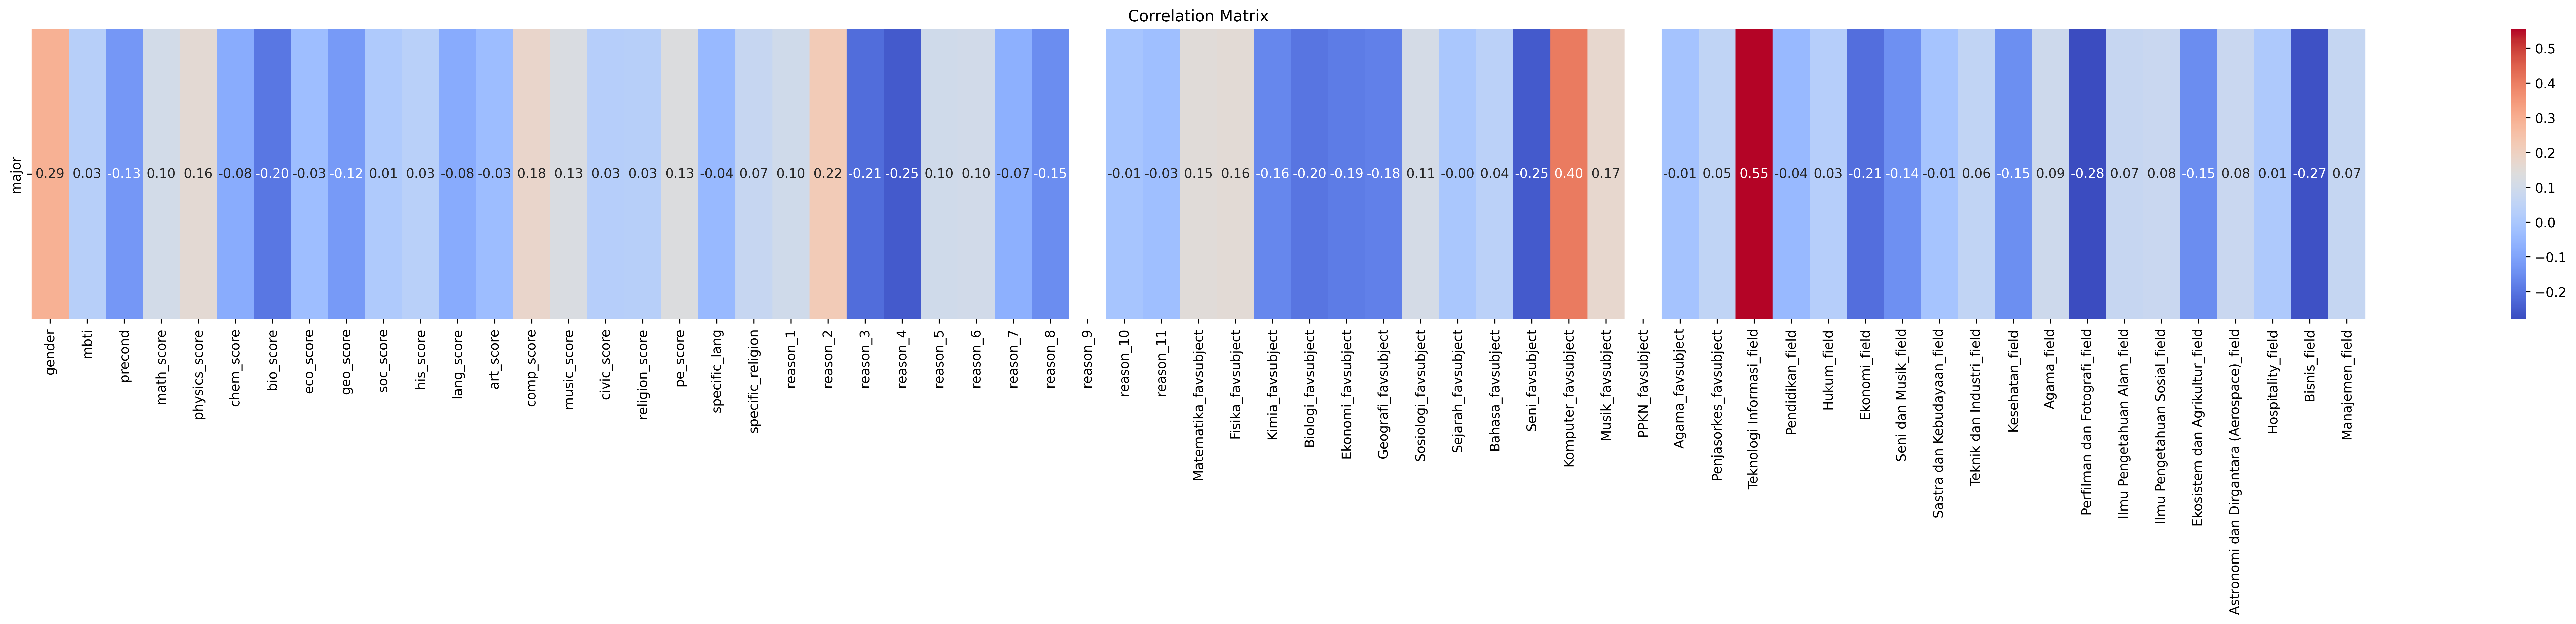

In [ ]:
fig = plt.figure(figsize=(40,4), dpi = 480)
correlation_matrix = data.corr()
y_to_X_correlations = correlation_matrix['major'].drop('major')
subset_corr_matrix = correlation_matrix.loc[['major'], y_to_X_correlations.index]
sns.heatmap(subset_corr_matrix, annot = True, cmap='coolwarm', fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = X.drop(columns=['mbti'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf= 2,
    min_samples_split= 2,
    n_estimators= 200
  )
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
#untuk cross validation dataset
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X, Y, cv = k_folds)
scores

array([0.9       , 0.8       , 0.7       , 0.77777778, 0.44444444,
       0.44444444, 0.55555556, 0.33333333, 0.55555556, 0.55555556])

In [ ]:
prediction = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print('CLASSIFICATION REPORT:\n', classification_report(prediction,y_test))

CLASSIFICATION REPORT:
                           precision    recall  f1-score   support

               Akuntansi       0.67      0.67      0.67         3
Desain Komunikasi Visual       1.00      0.67      0.80         3
                 Farmasi       1.00      0.67      0.80         3
              Ilmu Hukum       1.00      1.00      1.00         1
               Manajemen       0.80      0.80      0.80         5
               Psikologi       0.33      1.00      0.50         1
      Teknik Informatika       1.00      1.00      1.00         3

                accuracy                           0.79        19
               macro avg       0.83      0.83      0.80        19
            weighted avg       0.86      0.79      0.81        19



In [ ]:
print(accuracy_score(prediction,y_test))
print("F1-Score : " + str(f1_score(prediction,y_test, average='micro')))

0.7894736842105263
F1-Score : 0.7894736842105263


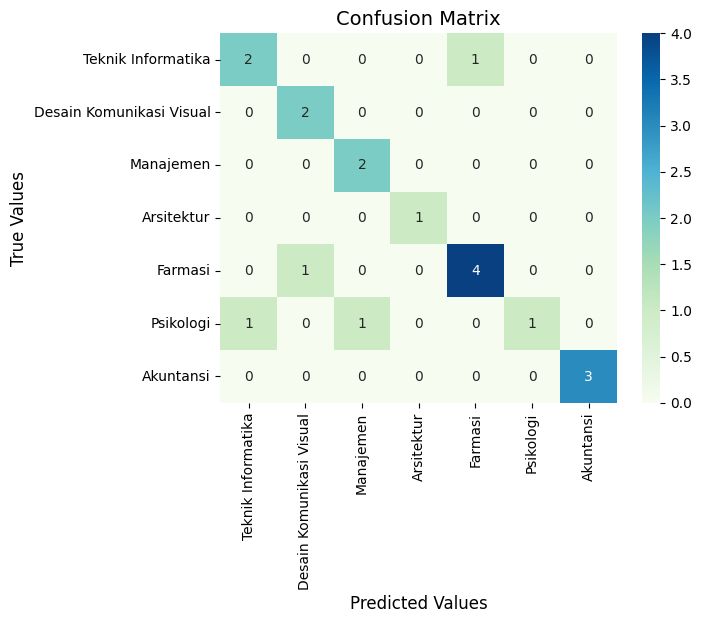

In [ ]:
labels = ['Teknik Informatika', 'Desain Komunikasi Visual', 'Manajemen',
       'Arsitektur', 'Farmasi', 'Psikologi', 'Akuntansi']
conf_mtx = confusion_matrix(y_test, prediction)
ax = sns.heatmap(conf_mtx, xticklabels=(labels), yticklabels=(labels), cmap='GnBu',annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

In [ ]:
confusion_matrix(y_test, prediction)

array([[2, 0, 0, 0, 1, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 4, 0, 0],
       [1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 3]])

In [ ]:
probabilities = clf.predict_proba(X_test.iloc[4:5])

print("Probabilities:", probabilities)

Probabilities: [[0.06592982 0.08008333 0.15662698 0.03608333 0.13981798 0.01625
  0.50520854]]


In [ ]:
clf.classes_

array(['Akuntansi', 'Desain Komunikasi Visual', 'Farmasi', 'Ilmu Hukum',
       'Manajemen', 'Psikologi', 'Teknik Informatika'], dtype=object)

In [ ]:
y_compare = {'label': clf.classes_, 'proba':probabilities[0]*100}

In [ ]:
X_test.iloc[4:5]

,gender,precond,math_score,physics_score,chem_score,bio_score,eco_score,geo_score,soc_score,his_score,lang_score,art_score,comp_score,music_score,civic_score,religion_score,pe_score,specific_lang,specific_religion,reason_1,reason_2,reason_3,reason_4,reason_5,reason_6,reason_7,reason_8,reason_9,reason_10,reason_11,Matematika_favsubject,Fisika_favsubject,Kimia_favsubject,Biologi_favsubject,Ekonomi_favsubject,Geografi_favsubject,Sosiologi_favsubject,Sejarah_favsubject,Bahasa_favsubject,Seni_favsubject,Komputer_favsubject,Musik_favsubject,PPKN_favsubject,Agama_favsubject,Penjasorkes_favsubject,Teknologi Informasi_field,Pendidikan_field,Hukum_field,Ekonomi_field,Seni dan Musik_field,Sastra dan Kebudayaan_field,Teknik dan Industri_field,Kesehatan_field,Agama_field,Perfilman dan Fotografi_field,Ilmu Pengetahuan Alam_field,Ilmu Pengetahuan Sosial_field,Ekosistem dan Agrikultur_field,Astronomi dan Dirgantara (Aerospace)_field,Hospitality_field,Bisnis_field,Manajemen_field
0,1,2,5,5,3,5,0,0,0,4,4,4,5,5,4,4,5,0.0,0.0,True,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
y_test.iloc[4:5]

0    Teknik Informatika
Name: major, dtype: object

In [ ]:
profit_compare = pd.DataFrame(y_compare)
profit_compare = profit_compare.sort_values(by='proba',ascending=False).reset_index(drop=True)
profit_compare

,label,proba
0,Teknik Informatika,50.520854
1,Farmasi,15.662698
2,Manajemen,13.981798
3,Desain Komunikasi Visual,8.008333
4,Akuntansi,6.592982
5,Ilmu Hukum,3.608333
6,Psikologi,1.625000


In [ ]:
import joblib

# Train a RandomForestClassifier
model = RandomForestClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf= 2,
    min_samples_split= 2,
    n_estimators= 200
)
model.fit(X, Y)
k_folds = KFold(n_splits = 10)
scores = cross_val_score(model, X, Y, cv = k_folds)

# Save the trained model to a .pkl file
joblib.dump(model, 'model.pkl')

['model.pkl']